
## IS KENYA LIVING BEYOND HER MEANS?




---



# The following analysis aims to analyze the trend of Kenya's Income and Expenditure levels vs Debt over a 20 year period.

---



 # Research Objectives:

* To describe the expenditure and revenue levels .

* To Support or negate the hypothesis that Kenya does live beyond her means per regime.

* Predict the expenditure and revenue levels over the next 5 years.



---


# Type of analysis:


1.   Time series analysis.
2.   Trend analysis.
3.   ARIMA modelling.

# Data Analysis steps


1.   Data preprocessing.
2.   Exploratory Data Analysis.
3.   Predictive Analysis.





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn')

# Load the Revenue, Expenditure and Debt datasets.




In [3]:
Revenue_Expenditure=pd.read_csv("https://raw.githubusercontent.com/Carolkinyua-hub/Public_Finance/main/508057315_Revenue%20and%20Expenditure%20(2).csv")

In [4]:
Debt=pd.read_csv("https://raw.githubusercontent.com/Carolkinyua-hub/Public_Finance/main/567245444_Public%20Debt%20-%20567245444_Public%20Debt.csv",skiprows=3)

Introduce a DATE column to the dataframes

In [5]:
Revenue_Expenditure['DAY'] = 1 
cols = ["FISCAL YEAR", "MONTH", "DAY"]
Revenue_Expenditure['DATE'] = Revenue_Expenditure[cols].apply(
    lambda x: '-'.join(x.values.astype(str)), axis="columns")
Revenue_Expenditure['DATE'] = pd.to_datetime(Revenue_Expenditure['DATE'])

Debt['DAY'] = 1
cols = ["Year", "Month", "DAY"]
Debt['DATE'] = Debt[cols].apply(
    lambda x: '-'.join(x.values.astype(str)), axis="columns")
Debt['DATE'] = pd.to_datetime(Debt['DATE'])

Revenue_Expenditure.head()

,FISCAL YEAR,MONTH,Import Duty,Excise Duty,Income Tax,VAT,OTHER TAX INCOME,TOTAL TAX,NON-TAX REVENUE,TOTAL REVENUE,...,Foreign Interest,Wages & Salaries,Pensions,Other,TOTAL RECURRENT EXPENDITURE,County Transfer,EXPENDITURE,TOTAL EXPENDITURE,DAY,DATE
0,1999,9,"7,157.00","6,869.00","12,054.00","9,255.00",NaN,"35,335.00","5,979.00","41,314.00",...,"3,068.00","16,749.00","1,387.00","12,919.00","37,939.00",NaN,"6,539.00","44,478.00",1,1999-09-01
1,1999,12,"13,912.00","14,007.00","25,545.00","19,734.00",NaN,"73,198.00","13,131.00","86,329.00",...,"4,597.00","33,483.00","2,520.00","24,135.00","73,670.00",NaN,"12,765.00","86,435.00",1,1999-12-01
2,2000,3,"21,407.00","21,182.00","37,156.00","30,091.00",NaN,"109,836.00","20,756.00","130,592.00",...,"6,039.00","50,232.00","3,732.00","39,481.00","115,268.00",NaN,"22,493.00","137,761.00",1,2000-03-01
3,2000,6,"28,605.00","28,493.00","54,402.00","40,944.00",NaN,"152,444.00","25,999.00","178,443.00",...,"8,635.00","65,861.00","5,145.00","56,142.00","156,535.00",NaN,"18,584.00","175,119.00",1,2000-06-01
4,2000,7,"2,813.00","1,572.00","2,905.00","2,708.00",NaN,"9,998.00","1,617.00","11,615.00",...,746,"5,805.00",543,"4,225.00","14,058.00",NaN,"1,360.00","15,418.00",1,2000-07-01


In [6]:
print("There are, data points ", Revenue_Expenditure.shape)

There are, data points  (270, 24)


In [7]:
print(Revenue_Expenditure.columns)

Index(['FISCAL YEAR', 'MONTH', 'Import Duty', 'Excise Duty', 'Income Tax',
       'VAT', 'OTHER TAX INCOME', 'TOTAL TAX', 'NON-TAX  REVENUE',
       'TOTAL REVENUE', 'Programme Grants', 'Projects Grants', 'Total Grants',
       'Domestic Interest ', 'Foreign Interest', 'Wages & Salaries',
       'Pensions', 'Other', 'TOTAL RECURRENT EXPENDITURE', 'County Transfer',
       'EXPENDITURE', 'TOTAL EXPENDITURE', 'DAY', 'DATE'],
      dtype='object')


# Data Cleaning

## Identifying any missing values.

In [8]:
#Data Cleaning
Revenue_Expenditure.isnull().any()

FISCAL YEAR                    False
MONTH                          False
Import Duty                    False
Excise Duty                    False
Income Tax                     False
VAT                            False
OTHER TAX INCOME                True
TOTAL TAX                      False
NON-TAX  REVENUE               False
TOTAL REVENUE                  False
Programme Grants                True
Projects Grants                False
Total Grants                   False
Domestic Interest              False
Foreign Interest               False
Wages & Salaries               False
Pensions                       False
Other                          False
TOTAL RECURRENT EXPENDITURE    False
County Transfer                 True
EXPENDITURE                    False
TOTAL EXPENDITURE              False
DAY                            False
DATE                           False
dtype: bool

In [9]:
print(Revenue_Expenditure.isnull().mean()*100)

FISCAL YEAR                     0.000000
MONTH                           0.000000
Import Duty                     0.000000
Excise Duty                     0.000000
Income Tax                      0.000000
VAT                             0.000000
OTHER TAX INCOME               65.925926
TOTAL TAX                       0.000000
NON-TAX  REVENUE                0.000000
TOTAL REVENUE                   0.000000
Programme Grants               17.037037
Projects Grants                 0.000000
Total Grants                    0.000000
Domestic Interest               0.000000
Foreign Interest                0.000000
Wages & Salaries                0.000000
Pensions                        0.000000
Other                           0.000000
TOTAL RECURRENT EXPENDITURE     0.000000
County Transfer                59.629630
EXPENDITURE                     0.000000
TOTAL EXPENDITURE               0.000000
DAY                             0.000000
DATE                            0.000000
dtype: float64


# Data Cleaning formula

# Converting data object type to integer

In [10]:
#Consolidate Columns
# Drop Collumns
#Aggregate Data
#Prepare data for analysis
Revenue_Expenditure=Revenue_Expenditure.fillna(0)
Revenue_Expenditure['TOTAL REVENUE'] = Revenue_Expenditure['TOTAL REVENUE'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['TOTAL EXPENDITURE'] = Revenue_Expenditure['TOTAL EXPENDITURE'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['CUM TOTAL EXPENDITURE'] = Revenue_Expenditure['TOTAL EXPENDITURE'].cumsum()
Revenue_Expenditure['CUM TOTAL REVENUE'] = Revenue_Expenditure['TOTAL REVENUE'].cumsum()
Revenue_Expenditure['DEFICIT'] = Revenue_Expenditure['TOTAL EXPENDITURE'] - Revenue_Expenditure['TOTAL REVENUE']
Revenue_Expenditure['CUM DEFICIT'] = Revenue_Expenditure['DEFICIT'].cumsum()


In [11]:
Revenue_Expenditure['Import Duty'] = Revenue_Expenditure['Import Duty'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['Excise Duty'] = Revenue_Expenditure['Excise Duty'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['Income Tax'] = Revenue_Expenditure['Income Tax'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['VAT'] = Revenue_Expenditure['VAT'].str.replace(',', '').astype(
    float).astype(int)
Revenue_Expenditure['OTHER TAX INCOME']= Revenue_Expenditure['OTHER TAX INCOME']
Revenue_Expenditure['TOTAL TAX'] = Revenue_Expenditure['TOTAL TAX'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['NON-TAX  REVENUE'] = Revenue_Expenditure['NON-TAX  REVENUE'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['TOTAL TAX'] = Revenue_Expenditure['TOTAL TAX'].astype(float).astype(int)

#Revenue_Expenditure['Programme Grants']= Revenue_Expenditure['Programme Grants'].astype(float).astype(int)
# Revenue_Expenditure[["FISCAL YEAR", "MONTH", "DAY"]]


In [12]:
Revenue_Expenditure['Projects Grants'] = Revenue_Expenditure['Projects Grants'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['Total Grants'] = Revenue_Expenditure['Total Grants'].str.replace(
    ',', '').astype(float).astype(int)
#Revenue_Expenditure ['Domestic Interest ']= Revenue_Expenditure['Domestic Interest'].astype(float).astype(int)
Revenue_Expenditure['Foreign Interest'] = Revenue_Expenditure['Foreign Interest'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['Wages & Salaries'] = Revenue_Expenditure['Wages & Salaries'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['Pensions'] = Revenue_Expenditure['Pensions'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['Other'] = Revenue_Expenditure['Other'].str.replace(
    ',', '').astype(float).astype(int)
Revenue_Expenditure['TOTAL RECURRENT EXPENDITURE'] = Revenue_Expenditure['TOTAL RECURRENT EXPENDITURE'].str.replace(
    ',', '').astype(float).astype(int)
#Revenue_Expenditure[ 'County Transfer']= Revenue_Expenditure['County Transfer'].str.replace(',','').astype(float).astype(int)

In [13]:
Revenue_Expenditure.head()

,FISCAL YEAR,MONTH,Import Duty,Excise Duty,Income Tax,VAT,OTHER TAX INCOME,TOTAL TAX,NON-TAX REVENUE,TOTAL REVENUE,...,TOTAL RECURRENT EXPENDITURE,County Transfer,EXPENDITURE,TOTAL EXPENDITURE,DAY,DATE,CUM TOTAL EXPENDITURE,CUM TOTAL REVENUE,DEFICIT,CUM DEFICIT
0,1999,9,7157,6869,12054,9255,0,35335,5979,41314,...,37939,0,"6,539.00",44478,1,1999-09-01,44478,41314,3164,3164
1,1999,12,13912,14007,25545,19734,0,73198,13131,86329,...,73670,0,"12,765.00",86435,1,1999-12-01,130913,127643,106,3270
2,2000,3,21407,21182,37156,30091,0,109836,20756,130592,...,115268,0,"22,493.00",137761,1,2000-03-01,268674,258235,7169,10439
3,2000,6,28605,28493,54402,40944,0,152444,25999,178443,...,156535,0,"18,584.00",175119,1,2000-06-01,443793,436678,-3324,7115
4,2000,7,2813,1572,2905,2708,0,9998,1617,11615,...,14058,0,"1,360.00",15418,1,2000-07-01,459211,448293,3803,10918


In [14]:
Revenue_Expenditure.dtypes

FISCAL YEAR                             int64
MONTH                                   int64
Import Duty                             int32
Excise Duty                             int32
Income Tax                              int32
VAT                                     int32
OTHER TAX INCOME                       object
TOTAL TAX                               int32
NON-TAX  REVENUE                        int32
TOTAL REVENUE                           int32
Programme Grants                       object
Projects Grants                         int32
Total Grants                            int32
Domestic Interest                      object
Foreign Interest                        int32
Wages & Salaries                        int32
Pensions                                int32
Other                                   int32
TOTAL RECURRENT EXPENDITURE             int32
County Transfer                        object
EXPENDITURE                            object
TOTAL EXPENDITURE                 

#Data Normalization

In [15]:
Revenue_Expenditure.columns

Index(['FISCAL YEAR', 'MONTH', 'Import Duty', 'Excise Duty', 'Income Tax',
       'VAT', 'OTHER TAX INCOME', 'TOTAL TAX', 'NON-TAX  REVENUE',
       'TOTAL REVENUE', 'Programme Grants', 'Projects Grants', 'Total Grants',
       'Domestic Interest ', 'Foreign Interest', 'Wages & Salaries',
       'Pensions', 'Other', 'TOTAL RECURRENT EXPENDITURE', 'County Transfer',
       'EXPENDITURE', 'TOTAL EXPENDITURE', 'DAY', 'DATE',
       'CUM TOTAL EXPENDITURE', 'CUM TOTAL REVENUE', 'DEFICIT', 'CUM DEFICIT'],
      dtype='object')

In [16]:
Revenue_Expenditure.dtypes

FISCAL YEAR                             int64
MONTH                                   int64
Import Duty                             int32
Excise Duty                             int32
Income Tax                              int32
VAT                                     int32
OTHER TAX INCOME                       object
TOTAL TAX                               int32
NON-TAX  REVENUE                        int32
TOTAL REVENUE                           int32
Programme Grants                       object
Projects Grants                         int32
Total Grants                            int32
Domestic Interest                      object
Foreign Interest                        int32
Wages & Salaries                        int32
Pensions                                int32
Other                                   int32
TOTAL RECURRENT EXPENDITURE             int32
County Transfer                        object
EXPENDITURE                            object
TOTAL EXPENDITURE                 

In [17]:
Revenues_Expenditures=Revenue_Expenditure[['FISCAL YEAR', 'Income Tax', 'VAT', 'TOTAL TAX', 'NON-TAX  REVENUE', 'TOTAL REVENUE','Projects Grants', 'Total Grants', 'Foreign Interest', 'Wages & Salaries',
       'Pensions', 'Other', 'TOTAL RECURRENT EXPENDITURE', 'TOTAL EXPENDITURE', 'CUM TOTAL EXPENDITURE',
       'CUM TOTAL REVENUE', 'DEFICIT', 'CUM DEFICIT','DATE']]


In [18]:
Revenues_Expenditures.head()

,FISCAL YEAR,Income Tax,VAT,TOTAL TAX,NON-TAX REVENUE,TOTAL REVENUE,Projects Grants,Total Grants,Foreign Interest,Wages & Salaries,Pensions,Other,TOTAL RECURRENT EXPENDITURE,TOTAL EXPENDITURE,CUM TOTAL EXPENDITURE,CUM TOTAL REVENUE,DEFICIT,CUM DEFICIT,DATE
0,1999,12054,9255,35335,5979,41314,1197,1203,3068,16749,1387,12919,37939,44478,44478,41314,3164,3164,1999-09-01
1,1999,25545,19734,73198,13131,86329,2211,2540,4597,33483,2520,24135,73670,86435,130913,127643,106,3270,1999-12-01
2,2000,37156,30091,109836,20756,130592,3319,3663,6039,50232,3732,39481,115268,137761,268674,258235,7169,10439,2000-03-01
3,2000,54402,40944,152444,25999,178443,4247,4247,8635,65861,5145,56142,156535,175119,443793,436678,-3324,7115,2000-06-01
4,2000,2905,2708,9998,1617,11615,323,323,746,5805,543,4225,14058,15418,459211,448293,3803,10918,2000-07-01


In [19]:
R_E=Revenues_Expenditures.copy()

In [135]:
# scaler=StandardScaler()
# R_E_N=scaler.fit_transform(R_E)
# R_E_N

# Income Tax vs VAT

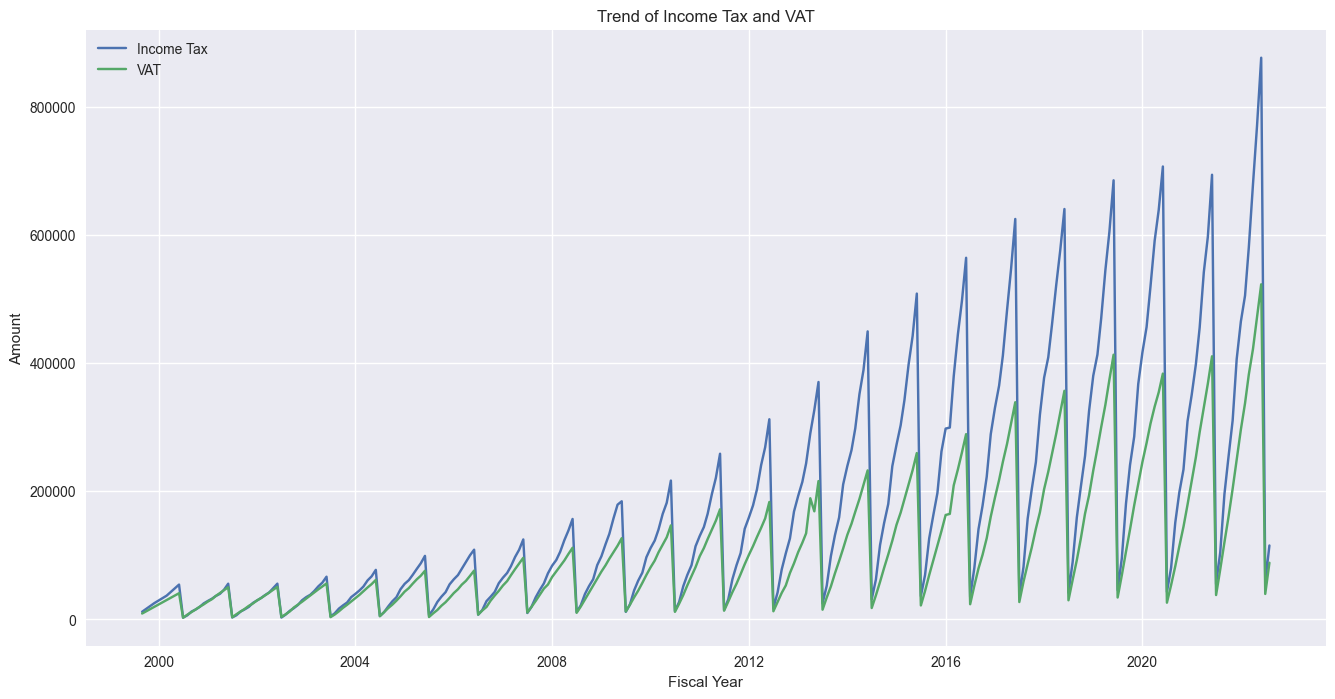

In [20]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(Revenues_Expenditures['DATE'],
         Revenues_Expenditures['Income Tax'], label='Income Tax')
plt.plot(Revenues_Expenditures['DATE'],
         Revenues_Expenditures['VAT'], label='VAT')
#give the chart an appropriate title
plt.title('Trend of Income Tax and VAT')
#give the chart an appropriate x and y label
plt.xlabel('Fiscal Year')
plt.ylabel('Amount')  
# plt.grid()
plt.legend()
plt.show()

# Total Tax vs Total Revenue

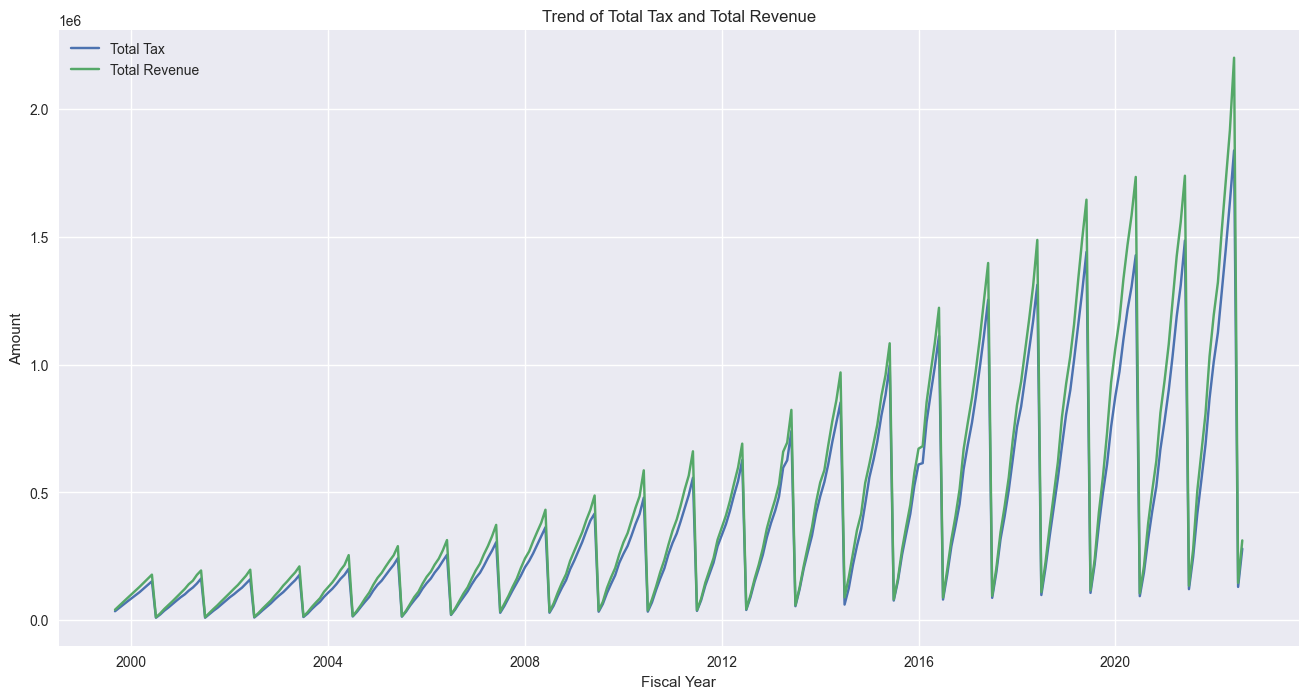

In [21]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(Revenues_Expenditures['DATE'],
         Revenues_Expenditures['TOTAL TAX'], label='Total Tax')
plt.plot(Revenues_Expenditures['DATE'],
         Revenues_Expenditures['TOTAL REVENUE'], label='Total Revenue')
plt.title('Trend of Total Tax and Total Revenue')
#give the chart an appropriate x and y label
plt.xlabel('Fiscal Year')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Contribution of Income Tax to Total Revenue

In [22]:
Revenues_Expenditures['Income Tax'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

40.47892742088486

In [23]:
Revenues_Expenditures['NON-TAX  REVENUE'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

13.005575672742125

In [24]:
Revenues_Expenditures['VAT'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

25.002144831219873

In [25]:
# Revenues_Expenditures['Total_Duty'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

In [26]:
Revenues_Expenditures['Projects Grants'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

2.165482935391362

In [27]:
Revenues_Expenditures['Total Grants'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

2.2778991713284515

In [28]:
Revenues_Expenditures['Foreign Interest'].sum()/Revenues_Expenditures['TOTAL EXPENDITURE'].sum()*100

3.136976767712722

In [29]:
Revenues_Expenditures[ 'Wages & Salaries'].sum()/Revenues_Expenditures['TOTAL EXPENDITURE'].sum()*100
       

22.436211153162013

In [30]:
Revenues_Expenditures['Pensions'].sum()/Revenues_Expenditures['TOTAL EXPENDITURE'].sum()*100


3.500933784921307

In [31]:
Revenues_Expenditures['Other'].sum()/Revenues_Expenditures['TOTAL EXPENDITURE'].sum()*100

28.16225344067974

In [32]:
Revenues_Expenditures['TOTAL RECURRENT EXPENDITURE'].sum()/Revenues_Expenditures['TOTAL EXPENDITURE'].sum()*100 

68.93828961925186

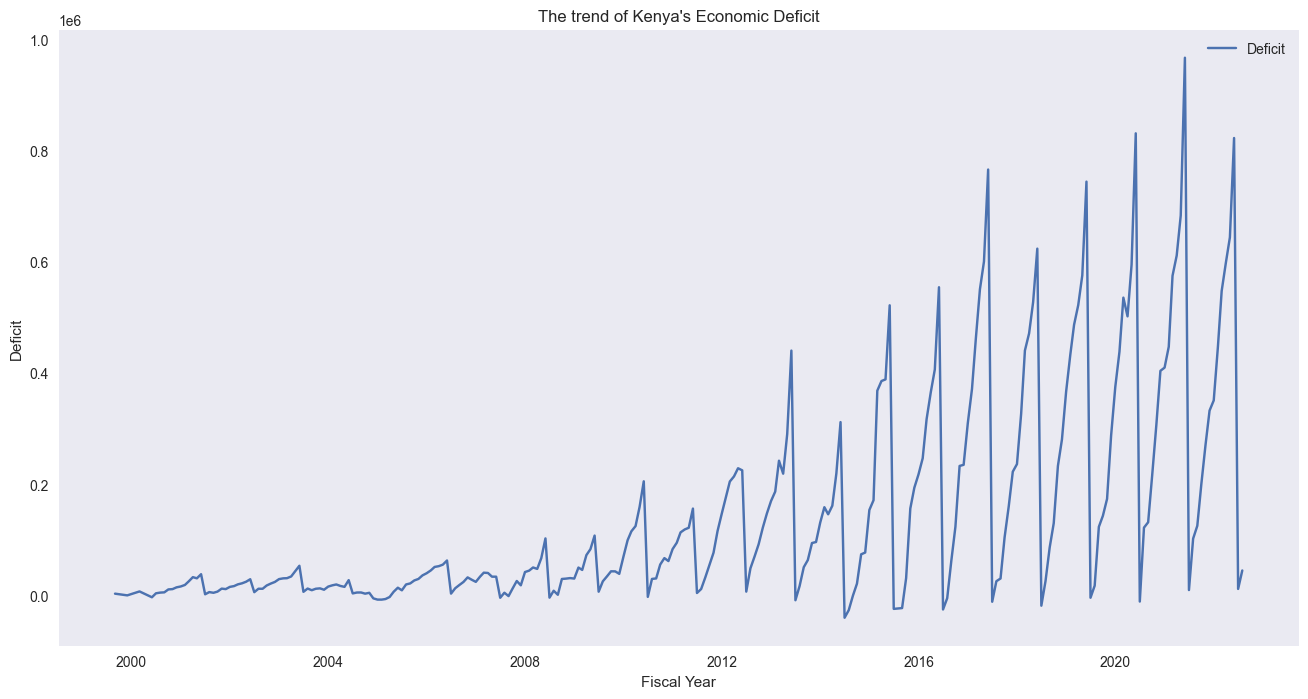

In [33]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(Revenues_Expenditures['DATE'],
         Revenues_Expenditures['DEFICIT'], label='Deficit')
plt.xlabel('Fiscal Year')
plt.ylabel('Deficit')
plt.title("The trend of Kenya's Economic Deficit")
plt.grid()
plt.legend()
plt.show()

## Debt Data

In [34]:
Debt.head()

,Year,Month,Domestic Debt,External Debt,Total,DAY,DATE
0,1999,9,"183,417.00","320,137.00","503,554.00",1,1999-09-01
1,1999,12,"190,300.00","311,953.00","502,253.00",1,1999-12-01
2,2000,3,"201,463.22","396,800.00","598,263.22",1,2000-03-01
3,2000,6,"206,127.00","395,694.00","601,821.00",1,2000-06-01
4,2000,7,"202,362.00","394,667.37","597,029.37",1,2000-07-01


In [35]:
Debt.shape

(271, 7)

In [36]:
Debt.dtypes

Year                      int64
Month                     int64
Domestic Debt            object
External Debt            object
Total                    object
DAY                       int64
DATE             datetime64[ns]
dtype: object

In [37]:
Debt.isnull().mean()*100

Year             0.0
Month            0.0
Domestic Debt    0.0
External Debt    0.0
Total            0.0
DAY              0.0
DATE             0.0
dtype: float64

In [38]:
Debt.rename(columns={'PUBLIC DEBT':'Year',"Unnamed: 1":'Month','Unnamed: 2':'Domestic Debt','Unnamed: 3':'External Debt',"Unnamed: 4":"Total"}, inplace=True)
Debt.fillna(0)
Debt=Debt.drop('Month', axis=1)

In [39]:
Debt.dtypes

Year                      int64
Domestic Debt            object
External Debt            object
Total                    object
DAY                       int64
DATE             datetime64[ns]
dtype: object

In [40]:
Debt.columns

Index(['Year', 'Domestic Debt', 'External Debt', 'Total', 'DAY', 'DATE'], dtype='object')

In [41]:
Debt.dtypes

Year                      int64
Domestic Debt            object
External Debt            object
Total                    object
DAY                       int64
DATE             datetime64[ns]
dtype: object

In [42]:
Debt['Total']= Debt['Total'].str.replace(',','').astype(float).astype(int)

In [43]:
Debt['Domestic Debt']= Debt['Domestic Debt'].str.replace(',','').astype(float).astype(int)

In [44]:
Debt['External Debt']= Debt['External Debt'].str.replace(',','').astype(float).astype(int)

In [45]:
Debt.dtypes

Year                      int64
Domestic Debt             int32
External Debt             int32
Total                     int32
DAY                       int64
DATE             datetime64[ns]
dtype: object

In [46]:
Deficit=Revenues_Expenditures['DEFICIT'].sum()

In [47]:
Total_Debt=Debt['Total'].sum()

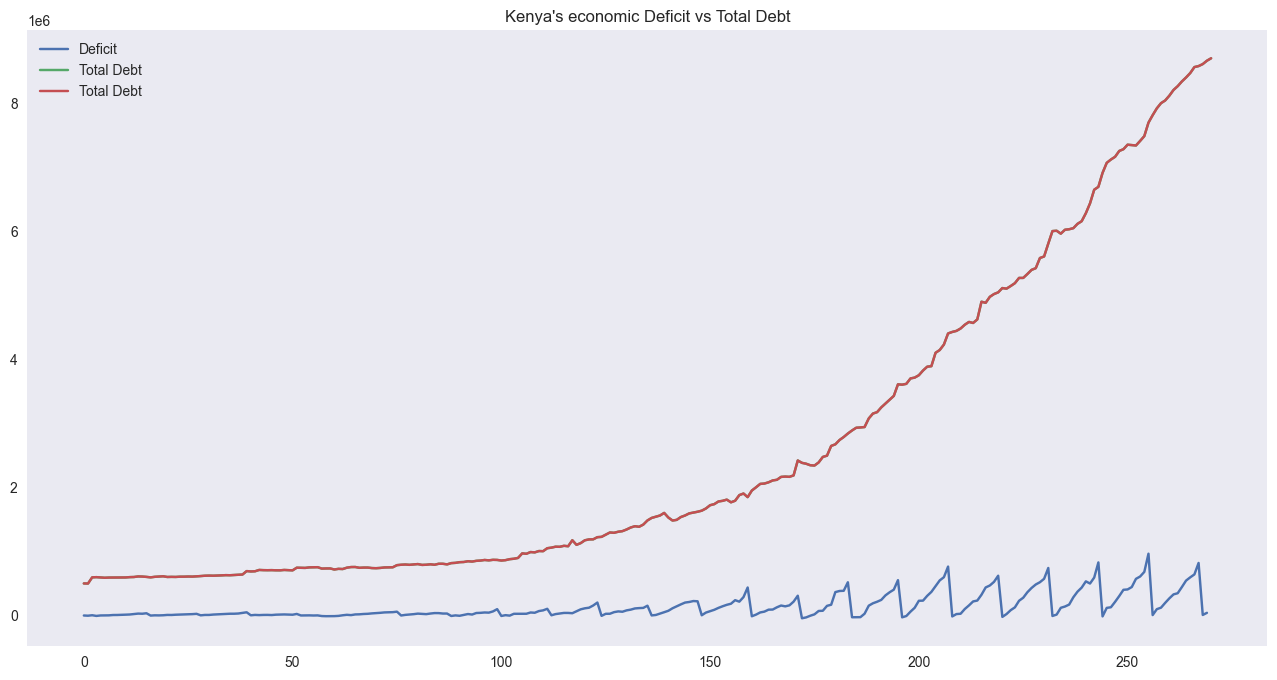

In [48]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(Revenues_Expenditures['DEFICIT'], label = 'Deficit')
Debt['Total'].plot(label="Total Debt")
Debt['Total'].plot(label="Total Debt")
plt.title("Kenya's economic Deficit vs Total Debt")
plt.grid()
plt.legend()
plt.show()


# Kibaki Regime Data

In [49]:
#Kibaki Tenure
#Kibaki's Expenditure
#Kibaki Expenditures and Revenues
#Kibaki's Deficit
Kibaki_Regime= (Revenues_Expenditures['FISCAL YEAR']>= 2003) & (Revenues_Expenditures['FISCAL YEAR'] <= 2012)
Kibaki_Rev= pd.DataFrame(Revenues_Expenditures['TOTAL REVENUE'].loc[Kibaki_Regime])
Kibaki_Exp=pd.DataFrame(Revenues_Expenditures['TOTAL EXPENDITURE'].loc[Kibaki_Regime])
Kibaki_Deficit=pd.DataFrame(Revenues_Expenditures.DEFICIT.loc[Kibaki_Regime])
Kibakis=pd.DataFrame(Revenues_Expenditures['FISCAL YEAR'][Kibaki_Regime])
#Kibaki's Debt
Kibakis_Regime= (Debt['Year']>= 2003) & (Debt['Year'] <= 2012)
Kibakis_Debt=pd.DataFrame(Debt['Total'].loc[Kibakis_Regime])
Kibakis_Duration = pd.DataFrame(Debt['DATE'].loc[Kibakis_Regime])


In [50]:
Kibaki=pd.concat([Kibakis,Kibakis_Debt,Kibaki_Deficit,Kibaki_Exp,Kibaki_Rev,Kibakis_Duration],axis=1)

In [51]:
Kibaki.head()

,FISCAL YEAR,Total,DEFICIT,TOTAL EXPENDITURE,TOTAL REVENUE,DATE
34,2003,633037,29385,143691,114306,2003-01-01
35,2003,631662,30735,166298,135563,2003-02-01
36,2003,635620,31036,182121,151085,2003-03-01
37,2003,639688,34135,204334,170199,2003-04-01
38,2003,642660,43677,231008,187331,2003-05-01


# Uhuru Tenure

In [52]:
#Uhuru Tenure
#Uhuru Expenditure
#Uhuru Expenditures and Revenues
#UhuruDeficit
Uhuru_Regime= (Revenues_Expenditures['FISCAL YEAR']>= 2013) & (Revenues_Expenditures['FISCAL YEAR'] <= 2022)
Uhuru_Rev= pd.DataFrame(Revenues_Expenditures['TOTAL REVENUE'][Uhuru_Regime])
Uhuru_Exp=pd.DataFrame(Revenues_Expenditures['TOTAL EXPENDITURE'][Uhuru_Regime])
Uhuru_Deficit=pd.DataFrame(Revenues_Expenditures.DEFICIT[Uhuru_Regime])
Uhurus=pd.DataFrame(Revenues_Expenditures['FISCAL YEAR'][Uhuru_Regime])
#Uhuru's Debt
Uhurus_Regime= (Debt['Year']>= 2013) & (Debt['Year'] <= 2022)
Uhurus_Debt=pd.DataFrame(Debt['Total'][Uhurus_Regime])
Uhurus_Duration = pd.DataFrame(Debt['DATE'][Uhurus_Regime])


In [53]:
Uhuru=pd.concat([Uhurus,Uhurus_Debt,Uhuru_Deficit,Uhuru_Exp,Uhuru_Rev,Uhurus_Duration],axis=1)

In [54]:
Uhuru.head()

,FISCAL YEAR,Total,DEFICIT,TOTAL EXPENDITURE,TOTAL REVENUE,DATE
154,2013.0,1811945,169972.0,589548.0,419576.0,2013-01-01
155,2013.0,1770017,186905.0,660191.0,473286.0,2013-02-01
156,2013.0,1794611,242484.0,774076.0,531592.0,2013-03-01
157,2013.0,1882405,219172.0,878171.0,658999.0,2013-04-01
158,2013.0,1907035,290475.0,985521.0,695046.0,2013-05-01


# Plotting the Expenditure of the tenures

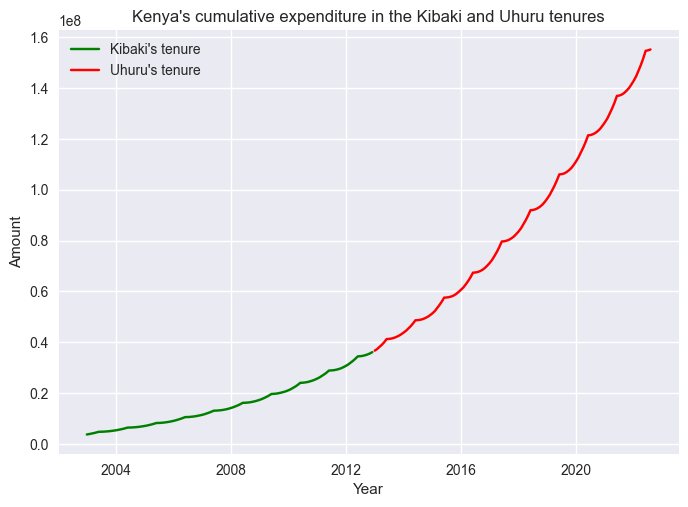

In [62]:
plt.plot(Revenue_Expenditure['DATE'][Kibaki_Regime], Revenue_Expenditure['CUM TOTAL EXPENDITURE'][Kibaki_Regime],
         label="Kibaki's tenure", color='green')
plt.plot(Revenue_Expenditure['DATE'][Uhuru_Regime], Revenue_Expenditure['CUM TOTAL EXPENDITURE'][Uhuru_Regime],
         label="Uhuru's tenure", color='red')


plt.title("Kenya's cumulative expenditure in the Kibaki and Uhuru tenures")
plt.ylabel("Amount")
plt.xlabel("Year")
plt.legend()
plt.show()


# Plotting the Revenue of the tenures

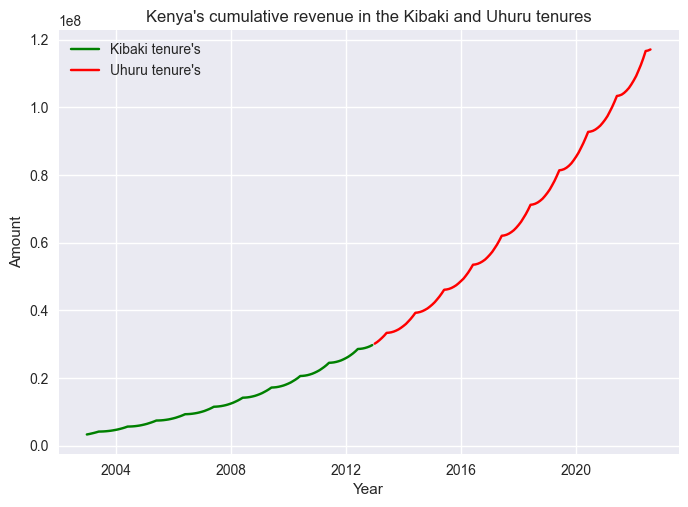

In [59]:

plt.plot(Revenue_Expenditure['DATE'][Kibaki_Regime], Revenue_Expenditure['CUM TOTAL REVENUE'][Kibaki_Regime],
         label="Kibaki tenure's", color='green')
plt.plot(Revenue_Expenditure['DATE'][Uhuru_Regime], Revenue_Expenditure['CUM TOTAL REVENUE'][Uhuru_Regime],
         label="Uhuru tenure's", color='red')


plt.title("Kenya's cumulative revenue in the Kibaki and Uhuru tenures")
plt.ylabel("Amount")
plt.xlabel("Year")
plt.legend()
plt.show()


# Plotting the Deficit of the tenures

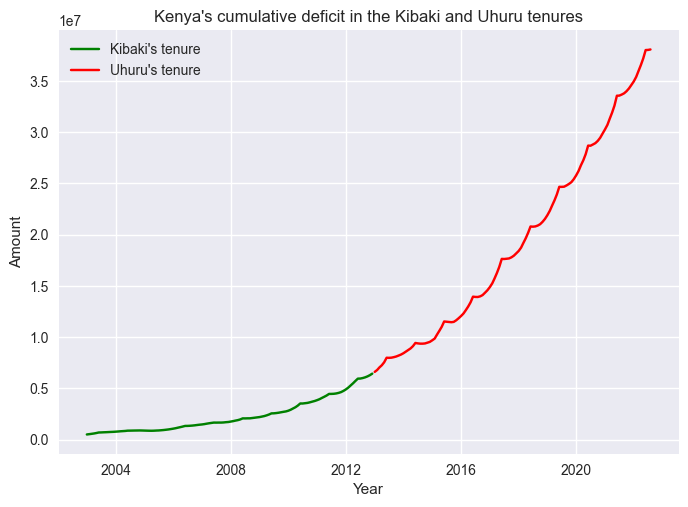

In [63]:
plt.plot(Revenue_Expenditure['DATE'][Kibaki_Regime], Revenue_Expenditure['CUM DEFICIT'][Kibaki_Regime],
         label="Kibaki's tenure", color='green')
plt.plot(Revenue_Expenditure['DATE'][Uhuru_Regime], Revenue_Expenditure['CUM DEFICIT'][Uhuru_Regime],
         label="Uhuru's tenure", color='red')


plt.title("Kenya's cumulative deficit in the Kibaki and Uhuru tenures")
plt.ylabel("Amount")
plt.xlabel("Year")
plt.legend()
plt.show()
